In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 16})

In [2]:
dist_ct_arb = pd.read_pickle("./logs/5/dist/dist_log_ct_arb_5.pickle")
dist_ct_real = pd.read_pickle("./logs/5/dist/dist_log_ct_real_5.pickle")

dist_ut_arb = pd.read_pickle("./logs/5/dist/dist_log_ut_arb_5.pickle")
dist_ut_real = pd.read_pickle("./logs/5/dist/dist_log_ut_real_5.pickle")

dist_lmd_arb = pd.read_pickle("./logs/5/dist/dist_log_lmd_arb_5.pickle")
dist_lmd_real = pd.read_pickle("./logs/5/dist/dist_log_lmd_real_5.pickle")

night_ct_arb = pd.read_pickle("./logs/5/night/night_log_ct_arb_5.pickle")
night_ct_real = pd.read_pickle("./logs/5/night/night_log_ct_real_5.pickle")

night_ut_arb = pd.read_pickle("./logs/5/night/night_log_ut_arb_5.pickle")
night_ut_real = pd.read_pickle("./logs/5/night/night_log_ut_real_5.pickle")

night_lmd_arb = pd.read_pickle("./logs/5/night/night_log_lmd_arb_5.pickle")
night_lmd_real = pd.read_pickle("./logs/5/night/night_log_lmd_real_5.pickle")

dumb_ct_arb = pd.read_pickle("./logs/5/dumb/dumb_ct_arb_5.pickle")
dumb_ct_real = pd.read_pickle("./logs/5/dumb/dumb_ct_real_5.pickle")

dumb_ut_arb = pd.read_pickle("./logs/5/dumb/dumb_ut_arb_5.pickle")
dumb_ut_real = pd.read_pickle("./logs/5/dumb/dumb_ut_real_5.pickle")

dumb_lmd_arb = pd.read_pickle("./logs/5/dumb/dumb_lmd_arb_5.pickle")
dumb_lmd_real = pd.read_pickle("./logs/5/dumb/dumb_lmd_real_5.pickle")

lin_ct_arb = pd.read_pickle("./logs/lin/ct_arb_lin_log.pickle")
lin_ct_real = pd.read_pickle("./logs/lin/ct_real_lin_log.pickle")

lin_ut_arb = pd.read_pickle("./logs/lin/ut_arb_lin_log.pickle")
lin_ut_real = pd.read_pickle("./logs/lin/ut_real_lin_log.pickle")

lin_lmd_arb = pd.read_pickle("./logs/lin/lmd_arb_lin_log.pickle")
lin_lmd_real = pd.read_pickle("./logs/lin/lmd_real_lin_log.pickle")
#
# rl_ct_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_ct_arb.pickle")
# rl_ct_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_ct_real.pickle")
#
# rl_ut_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_ut_arb.pickle")
# rl_ut_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_ut_real.pickle")
#
# rl_lmd_arb = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_lmd_arb.pickle")
# rl_lmd_real = pd.read_pickle("./../RL/trained_agents/PPO/1/vast_jul_25_new/PPO_final_lmd_real.pickle")

In [2]:
rl_ct_arb = pd.read_pickle("./../RL/trained_agents/PPO/5/vast_5_all/rl_ct_arb_5.pickle")
rl_ct_real = pd.read_pickle("./../RL/trained_agents/PPO/5/vast_5_all/rl_ct_real_5.pickle")

rl_ut_arb = pd.read_pickle("./../RL/trained_agents/PPO/5/vast_5_all/rl_ut_arb_5.pickle")
rl_ut_real = pd.read_pickle("./../RL/trained_agents/PPO/5/vast_5_all/rl_ut_real_5.pickle")

rl_lmd_arb = pd.read_pickle("./../RL/trained_agents/PPO/5/vast_5_all/rl_lmd_arb_5.pickle")
rl_lmd_real = pd.read_pickle("./../RL/trained_agents/PPO/5/vast_5_all/rl_lmd_real_5.pickle")

In [4]:
dist_ct_arb["hour_id"] = (dist_ct_arb["Time"].dt.hour + dist_ct_arb["Time"].dt.minute / 60)
dist_ut_arb["hour_id"] = (dist_ut_arb["Time"].dt.hour + dist_ut_arb["Time"].dt.minute / 60)
dist_lmd_arb["hour_id"] = (dist_lmd_arb["Time"].dt.hour + dist_lmd_arb["Time"].dt.minute / 60)

mean_per_hid_dist_ct_arb = dist_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_ut_arb = dist_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_lmd_arb = dist_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dist_ct_arb = []
mean_all_dist_ut_arb = []
mean_all_dist_lmd_arb = []

mean_all_dist_ct_arb = [np.mean(array) for array in mean_per_hid_dist_ct_arb]
mean_all_dist_ut_arb = [np.mean(array) for array in mean_per_hid_dist_ut_arb]
mean_all_dist_lmd_arb = [np.mean(array) for array in mean_per_hid_dist_lmd_arb]

mean_dist_ct_arb = pd.DataFrame()
mean_dist_ut_arb = pd.DataFrame()
mean_dist_lmd_arb = pd.DataFrame()

mean_dist_ct_arb["Distributed charging"] = np.multiply(mean_all_dist_ct_arb, 4)
mean_dist_ut_arb["Distributed charging"] = np.multiply(mean_all_dist_ut_arb, 4)
mean_dist_lmd_arb["Distributed charging"] = np.multiply(mean_all_dist_lmd_arb, 4)

dist_ct_real['hour_id'] = dist_ct_real['Time'].dt.hour + dist_ct_real['Time'].dt.minute / 60
dist_ut_real['hour_id'] = dist_ut_real['Time'].dt.hour + dist_ut_real['Time'].dt.minute / 60
dist_lmd_real['hour_id'] = dist_lmd_real['Time'].dt.hour + dist_lmd_real['Time'].dt.minute / 60

mean_per_hid_dist_ct_real = dist_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_ut_real = dist_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dist_lmd_real = dist_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dist_ct_real = []
mean_all_dist_ut_real = []
mean_all_dist_lmd_real = []

mean_all_dist_ct_real = [np.mean(array) for array in mean_per_hid_dist_ct_real]
mean_all_dist_ut_real = [np.mean(array) for array in mean_per_hid_dist_ut_real]
mean_all_dist_lmd_real = [np.mean(array) for array in mean_per_hid_dist_lmd_real]

mean_dist_ct_real = pd.DataFrame()
mean_dist_ut_real = pd.DataFrame()
mean_dist_lmd_real = pd.DataFrame()

mean_dist_ct_real["Distributed charging"] = np.multiply(mean_all_dist_ct_real, 4)
mean_dist_ut_real["Distributed charging"] = np.multiply(mean_all_dist_ut_real, 4)
mean_dist_lmd_real["Distributed charging"] = np.multiply(mean_all_dist_lmd_real, 4)


In [5]:
real_power_night = []

night_ct_arb["hour_id"] = night_ct_arb["Time"].dt.hour + night_ct_arb["Time"].dt.minute / 60
night_ut_arb["hour_id"] = night_ut_arb["Time"].dt.hour + night_ut_arb["Time"].dt.minute / 60
night_lmd_arb["hour_id"] = night_lmd_arb["Time"].dt.hour + night_lmd_arb["Time"].dt.minute / 60

mean_per_hid_night_ct_arb = night_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_ut_arb = night_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_lmd_arb = night_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_night_ct_arb = []
mean_all_night_ut_arb = []
mean_all_night_lmd_arb = []

mean_all_night_ct_arb = [np.mean(array) for array in mean_per_hid_night_ct_arb]
mean_all_night_ut_arb = [np.mean(array) for array in mean_per_hid_night_ut_arb]
mean_all_night_lmd_arb = [np.mean(array) for array in mean_per_hid_night_lmd_arb]

mean_night_ct_arb = pd.DataFrame()
mean_night_ut_arb = pd.DataFrame()
mean_night_lmd_arb = pd.DataFrame()

mean_night_ct_arb["night charging"] = np.multiply(mean_all_night_ct_arb, 4)
mean_night_ut_arb["night charging"] = np.multiply(mean_all_night_ut_arb, 4)
mean_night_lmd_arb["night charging"] = np.multiply(mean_all_night_lmd_arb, 4)


night_ct_real['hour_id'] = night_ct_real['Time'].dt.hour + night_ct_real['Time'].dt.minute / 60
night_ut_real['hour_id'] = night_ut_real['Time'].dt.hour + night_ut_real['Time'].dt.minute / 60
night_lmd_real['hour_id'] = night_lmd_real['Time'].dt.hour + night_lmd_real['Time'].dt.minute / 60

mean_per_hid_night_ct_real = night_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_ut_real = night_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_night_lmd_real = night_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_night_ct_real = []
mean_all_night_ut_real = []
mean_all_night_lmd_real = []

mean_all_night_ct_real = [np.mean(array) for array in mean_per_hid_night_ct_real]
mean_all_night_ut_real = [np.mean(array) for array in mean_per_hid_night_ut_real]
mean_all_night_lmd_real = [np.mean(array) for array in mean_per_hid_night_lmd_real]

mean_night_ct_real = pd.DataFrame()
mean_night_ut_real = pd.DataFrame()
mean_night_lmd_real = pd.DataFrame()

mean_night_ct_real["night charging"] = np.multiply(mean_all_night_ct_real, 4)
mean_night_ut_real["night charging"] = np.multiply(mean_all_night_ut_real, 4)
mean_night_lmd_real["night charging"] = np.multiply(mean_all_night_lmd_real, 4)

In [6]:
dumb_ct_arb["hour_id"] = dumb_ct_arb["Time"].dt.hour + dumb_ct_arb["Time"].dt.minute / 60
dumb_ut_arb["hour_id"] = dumb_ut_arb["Time"].dt.hour + dumb_ut_arb["Time"].dt.minute / 60
dumb_lmd_arb["hour_id"] = dumb_lmd_arb["Time"].dt.hour + dumb_lmd_arb["Time"].dt.minute / 60

mean_per_hid_dumb_ct_arb = dumb_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_ut_arb = dumb_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_lmd_arb = dumb_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dumb_ct_arb = []
mean_all_dumb_ut_arb = []
mean_all_dumb_lmd_arb = []

mean_all_dumb_ct_arb = [np.mean(array) for array in mean_per_hid_dumb_ct_arb]
mean_all_dumb_ut_arb = [np.mean(array) for array in mean_per_hid_dumb_ut_arb]
mean_all_dumb_lmd_arb = [np.mean(array) for array in mean_per_hid_dumb_lmd_arb]

mean_dumb_ct_arb = pd.DataFrame()
mean_dumb_ut_arb = pd.DataFrame()
mean_dumb_lmd_arb = pd.DataFrame()

mean_dumb_ct_arb["dumb charging"] = np.multiply(mean_all_dumb_ct_arb, 4)
mean_dumb_ut_arb["dumb charging"] = np.multiply(mean_all_dumb_ut_arb, 4)
mean_dumb_lmd_arb["dumb charging"] = np.multiply(mean_all_dumb_lmd_arb, 4)

dumb_ct_real["hour_id"] = dumb_ct_real["Time"].dt.hour + dumb_ct_real["Time"].dt.minute / 60
dumb_ut_real["hour_id"] = dumb_ut_real["Time"].dt.hour + dumb_ut_real["Time"].dt.minute / 60
dumb_lmd_real["hour_id"] = dumb_lmd_real["Time"].dt.hour + dumb_lmd_real["Time"].dt.minute / 60

mean_per_hid_dumb_ct_real = dumb_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_ut_real = dumb_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_dumb_lmd_real = dumb_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_dumb_ct_real = []
mean_all_dumb_ut_real = []
mean_all_dumb_lmd_real = []

mean_all_dumb_ct_real = [np.mean(array) for array in mean_per_hid_dumb_ct_real]
mean_all_dumb_ut_real = [np.mean(array) for array in mean_per_hid_dumb_ut_real]
mean_all_dumb_lmd_real = [np.mean(array) for array in mean_per_hid_dumb_lmd_real]

mean_dumb_ct_real = pd.DataFrame()
mean_dumb_ut_real = pd.DataFrame()
mean_dumb_lmd_real = pd.DataFrame()

mean_dumb_ct_real["dumb charging"] = np.multiply(mean_all_dumb_ct_real, 4)
mean_dumb_ut_real["dumb charging"] = np.multiply(mean_all_dumb_ut_real, 4)
mean_dumb_lmd_real["dumb charging"] = np.multiply(mean_all_dumb_lmd_real, 4)

In [7]:
lin_ct_arb["hour_id"] = lin_ct_arb["Time"].dt.hour + lin_ct_arb["Time"].dt.minute / 60
lin_ut_arb["hour_id"] = lin_ut_arb["Time"].dt.hour + lin_ut_arb["Time"].dt.minute / 60
lin_lmd_arb["hour_id"] = lin_lmd_arb["Time"].dt.hour + lin_lmd_arb["Time"].dt.minute / 60

mean_per_hid_lin_ct_arb = lin_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_ut_arb = lin_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_lmd_arb = lin_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_lin_ct_arb = []
mean_all_lin_ut_arb = []
mean_all_lin_lmd_arb = []

mean_all_lin_ct_arb = [np.mean(array) for array in mean_per_hid_lin_ct_arb]
mean_all_lin_ut_arb = [np.mean(array) for array in mean_per_hid_lin_ut_arb]
mean_all_lin_lmd_arb = [np.mean(array) for array in mean_per_hid_lin_lmd_arb]

mean_lin_ct_arb = pd.DataFrame()
mean_lin_ut_arb = pd.DataFrame()
mean_lin_lmd_arb = pd.DataFrame()

mean_lin_ct_arb["lin charging"] = np.multiply(mean_all_lin_ct_arb, 4)
mean_lin_ut_arb["lin charging"] = np.multiply(mean_all_lin_ut_arb, 4)
mean_lin_lmd_arb["lin charging"] = np.multiply(mean_all_lin_lmd_arb, 4)

In [8]:
lin_ct_real["hour_id"] = lin_ct_real["Time"].dt.hour + lin_ct_real["Time"].dt.minute / 60
lin_ut_real["hour_id"] = lin_ut_real["Time"].dt.hour + lin_ut_real["Time"].dt.minute / 60
lin_lmd_real["hour_id"] = lin_lmd_real["Time"].dt.hour + lin_lmd_real["Time"].dt.minute / 60

mean_per_hid_lin_ct_real = lin_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_ut_real = lin_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_lin_lmd_real = lin_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_lin_ct_real = []
mean_all_lin_ut_real = []
mean_all_lin_lmd_real = []

mean_all_lin_ct_real = [np.mean(array) for array in mean_per_hid_lin_ct_real]
mean_all_lin_ut_real = [np.mean(array) for array in mean_per_hid_lin_ut_real]
mean_all_lin_lmd_real = [np.mean(array) for array in mean_per_hid_lin_lmd_real]

mean_lin_ct_real = pd.DataFrame()
mean_lin_ut_real = pd.DataFrame()
mean_lin_lmd_real = pd.DataFrame()

mean_lin_ct_real["lin charging"] = np.multiply(mean_all_lin_ct_real, 4)
mean_lin_ut_real["lin charging"] = np.multiply(mean_all_lin_ut_real, 4)
mean_lin_lmd_real["lin charging"] = np.multiply(mean_all_lin_lmd_real, 4)

In [3]:
rl_ct_arb["hour_id"] = rl_ct_arb["Time"].dt.hour + rl_ct_arb["Time"].dt.minute / 60
rl_ut_arb["hour_id"] = rl_ut_arb["Time"].dt.hour + rl_ut_arb["Time"].dt.minute / 60
rl_lmd_arb["hour_id"] = rl_lmd_arb["Time"].dt.hour + rl_lmd_arb["Time"].dt.minute / 60

mean_per_hid_rl_ct_arb = rl_ct_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_ut_arb = rl_ut_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_lmd_arb = rl_lmd_arb.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_rl_ct_arb = []
mean_all_rl_ut_arb = []
mean_all_rl_lmd_arb = []

mean_all_rl_ct_arb = [np.mean(array) for array in mean_per_hid_rl_ct_arb]
mean_all_rl_ut_arb = [np.mean(array) for array in mean_per_hid_rl_ut_arb]
mean_all_rl_lmd_arb = [np.mean(array) for array in mean_per_hid_rl_lmd_arb]

mean_rl_ct_arb = pd.DataFrame()
mean_rl_ut_arb = pd.DataFrame()
mean_rl_lmd_arb = pd.DataFrame()

mean_rl_ct_arb["rl charging"] = np.multiply(mean_all_rl_ct_arb, 4)
mean_rl_ut_arb["rl charging"] = np.multiply(mean_all_rl_ut_arb, 4)
mean_rl_lmd_arb["rl charging"] = np.multiply(mean_all_rl_lmd_arb, 4)

In [4]:
rl_ct_real["hour_id"] = rl_ct_real["Time"].dt.hour + rl_ct_real["Time"].dt.minute / 60
rl_ut_real["hour_id"] = rl_ut_real["Time"].dt.hour + rl_ut_real["Time"].dt.minute / 60
rl_lmd_real["hour_id"] = rl_lmd_real["Time"].dt.hour + rl_lmd_real["Time"].dt.minute / 60

mean_per_hid_rl_ct_real = rl_ct_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_ut_real = rl_ut_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)
mean_per_hid_rl_lmd_real = rl_lmd_real.groupby("hour_id").mean()["Charging energy"].reset_index(drop=True)

mean_all_rl_ct_real = []
mean_all_rl_ut_real = []
mean_all_rl_lmd_real = []

mean_all_rl_ct_real = [np.mean(array) for array in mean_per_hid_rl_ct_real]
mean_all_rl_ut_real = [np.mean(array) for array in mean_per_hid_rl_ut_real]
mean_all_rl_lmd_real = [np.mean(array) for array in mean_per_hid_rl_lmd_real]

mean_rl_ct_real = pd.DataFrame()
mean_rl_ut_real = pd.DataFrame()
mean_rl_lmd_real = pd.DataFrame()

mean_rl_ct_real["rl charging"] = np.multiply(mean_all_rl_ct_real, 4)
mean_rl_ut_real["rl charging"] = np.multiply(mean_all_rl_ut_real, 4)
mean_rl_lmd_real["rl charging"] = np.multiply(mean_all_rl_lmd_real, 4)

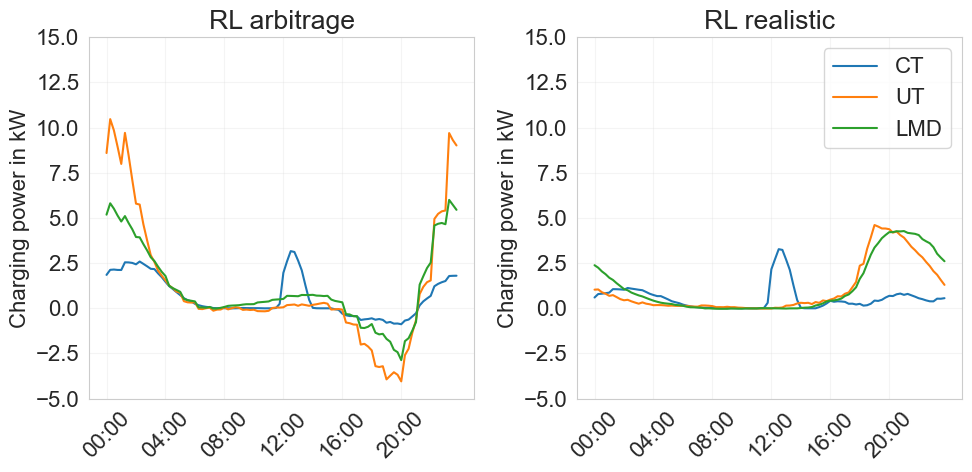

In [14]:
(fig, ax) = plt.subplots(1,2, figsize=(10,5))  # Changed subplot arrangement to 3 rows and 2 columns
#
# # First plot
# mean_dumb_ct_arb.plot(ax = ax[0,0])
# mean_dumb_ut_arb.plot(ax = ax[0,0])
# mean_dumb_lmd_arb.plot(ax = ax[0,0])
#
# ax[0,0].legend(["CT", "UT", "LMD"])
# ax[0,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
# ax[0,0].grid(alpha=0.2)
# ax[0,0].set_ylabel("Charging power in kW")
# ax[0,0].set_ylim([0, 11])
# ax[0,0].set_title("Dumb charging")
#
#
# # Second plot
# mean_dist_ct_arb.plot(ax = ax[0,1], legend=False)
# mean_dist_ut_arb.plot(ax = ax[0,1], legend=False)
# mean_dist_lmd_arb.plot(ax = ax[0,1], legend=False)
#
# ax[0,1].legend(["CT", "UT", "LMD"], loc="upper left")
# ax[0,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
# ax[0,1].grid(alpha=0.2)
# ax[0,1].set_ylabel("Charging power in kW")
# ax[0,1].set_ylim([0, 11])
# ax[0,1].set_title("Distributed charging")
#
#
# # Third plot
# mean_lin_ct_arb.plot(ax = ax[1,0], legend=False)
# mean_lin_ut_arb.plot(ax = ax[1,0], legend=False)
# mean_lin_lmd_arb.plot(ax = ax[1,0], legend=False)
#
# #ax[1,0].legend(["CT", "UT", "LMD"])
# ax[1,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
# ax[1,0].grid(alpha=0.2)
# ax[1,0].set_ylabel("Charging power in kW")
# ax[1,0].set_ylim([-7, 7])
# ax[1,0].set_title("LP arbitrage")
#
#
# # Fourth plot
# mean_lin_ct_real.plot(ax = ax[1,1], legend=False)
# mean_lin_ut_real.plot(ax = ax[1,1], legend=False)
# mean_lin_lmd_real.plot(ax = ax[1,1], legend=False)
#
# #ax[1,1].legend(["CT", "UT", "LMD"])
# ax[1,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
# ax[1,1].grid(alpha=0.2)
# ax[1,1].set_ylabel("Charging power in kW")
# ax[1,1].set_ylim([-7, 7])
# ax[1,1].set_title("LP realistic")
# Define your ticks and labels
ticks = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88]
labels = ["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"]

# Only keep every second tick and label
ticks = ticks[::2]
labels = labels[::2]

# Fifth plot
mean_rl_ct_arb.plot(ax = ax[0], legend=False)
mean_rl_ut_arb.plot(ax = ax[0], legend=False)
mean_rl_lmd_arb.plot(ax = ax[0], legend=False)

#ax[0].legend(["CT", "UT", "LMD"])
ax[0].set_xticks(ticks, labels, rotation=45)
ax[0].grid(alpha=0.2)
ax[0].set_ylabel("Charging power in kW")
ax[0].set_ylim([-5, 15])
ax[0].set_title("RL arbitrage")


# Sixth plot
mean_rl_ct_real.plot(ax = ax[1], legend=False)
mean_rl_ut_real.plot(ax = ax[1], legend=False)
mean_rl_lmd_real.plot(ax = ax[1], legend=False)

ax[1].legend(["CT", "UT", "LMD"])

#ax[1].legend(["CT", "UT", "LMD"])
ax[1].set_xticks(ticks, labels, rotation=45)
ax[1].grid(alpha=0.2)
ax[1].set_ylabel("Charging power in kW")
ax[1].set_ylim([-5, 15])
ax[1].set_title("RL realistic")


plt.tight_layout()
plt.show()


In [ ]:
(fig, ax) = plt.subplots(2,2, figsize=(8,8))  # Changed subplot arrangement to 3 rows and 2 columns

# Third plot
mean_lin_ct_arb.plot(ax = ax[0,0], legend=False)
mean_lin_ut_arb.plot(ax = ax[0,0], legend=False)
mean_lin_lmd_arb.plot(ax = ax[0,0], legend=False)

ax[0,0].legend(["CT", "UT", "LMD"])
ax[0,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,0].grid(alpha=0.2)
ax[0,0].set_ylabel("Charging power in kW")
ax[0,0].set_ylim([-7, 7])
ax[0,0].set_title("LP arbitrage")


# Fourth plot
mean_lin_ct_real.plot(ax = ax[0,1], legend=False)
mean_lin_ut_real.plot(ax = ax[0,1], legend=False)
mean_lin_lmd_real.plot(ax = ax[0,1], legend=False)

ax[0,1].legend(["CT", "UT", "LMD"])
ax[0,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[0,1].grid(alpha=0.2)
ax[0,1].set_ylabel("Charging power in kW")
ax[0,1].set_ylim([-7, 7])
ax[0,1].set_title("LP realistic")


# Fifth plot
mean_rl_ct_arb.plot(ax = ax[1,0], legend=False)
mean_rl_ut_arb.plot(ax = ax[1,0], legend=False)
mean_rl_lmd_arb.plot(ax = ax[1,0], legend=False)

#ax[2,0].legend(["CT", "UT", "LMD"])
ax[1,0].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,0].grid(alpha=0.2)
ax[1,0].set_ylabel("Charging power in kW")
ax[1,0].set_ylim([-15, 15])
ax[1,0].set_title("RL arbitrage")


# Sixth plot
mean_rl_ct_real.plot(ax = ax[1,1], legend=False)
mean_rl_ut_real.plot(ax = ax[1,1], legend=False)
mean_rl_lmd_real.plot(ax = ax[1,1], legend=False)

#ax[2,1].legend(["CT", "UT", "LMD"])
ax[1,1].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88],["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],rotation=45)
ax[1,1].grid(alpha=0.2)
ax[1,1].set_ylabel("Charging power in kW")
ax[1,1].set_ylim([-15, 15])
ax[1,1].set_title("RL realistic")


plt.tight_layout()
plt.show()


In [ ]:
min_missing = rl_lmd_arb["SOC violation"].sum()
avg_price = rl_lmd_arb["Observation"].mean()[4]

cashflow_comp_ct = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        (dumb_ct_arb["Cashflow"].sum() + (min_missing - dumb_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000),
        (dist_ct_arb["Cashflow"].sum() + (min_missing - dist_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000),
        (night_ct_arb["Cashflow"].sum() + (min_missing - night_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000),
        rl_ct_arb["Cashflow"].sum() + (min_missing - rl_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000,
        (lin_ct_arb["Cashflow"].sum() + (min_missing - lin_ct_arb["SOC violation"].sum()) * 16.7 * avg_price/1000)*5,
        (dumb_ct_real["Cashflow"].sum() + (min_missing - dumb_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000),
        (dist_ct_real["Cashflow"].sum() + (min_missing - dist_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000),
        (night_ct_real["Cashflow"].sum() + (min_missing - night_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000),
        rl_ct_real["Cashflow"].sum() + (min_missing - rl_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000,
        (lin_ct_real["Cashflow"].sum() + (min_missing - lin_ct_real["SOC violation"].sum()) * 16.7 * avg_price/1000)*5
    ]
})


In [ ]:
min_missing = rl_lmd_arb["SOC violation"].sum()
avg_price = rl_lmd_arb["Observation"].mean()[4]

cashflow_comp_ut = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        (dumb_ut_arb["Cashflow"].sum() + (min_missing - dumb_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000),
        (dist_ut_arb["Cashflow"].sum() + (min_missing - dist_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000),
        (night_ut_arb["Cashflow"].sum() + (min_missing - night_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000),
        rl_ut_arb["Cashflow"].sum() + (min_missing - rl_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000,
        (lin_ut_arb["Cashflow"].sum() + (min_missing - lin_ut_arb["SOC violation"].sum()) * 50 * avg_price/1000)*5,
        (dumb_ut_real["Cashflow"].sum() + (min_missing - dumb_ut_real["SOC violation"].sum()) * 50 * avg_price/1000),
        (dist_ut_real["Cashflow"].sum() + (min_missing - dist_ut_real["SOC violation"].sum()) * 50 * avg_price/1000),
        (night_ut_real["Cashflow"].sum() + (min_missing - night_ut_real["SOC violation"].sum()) * 50 * avg_price/1000),
        rl_ut_real["Cashflow"].sum() + (min_missing - rl_ut_real["SOC violation"].sum()) * 50 * avg_price/1000,
        (lin_ut_real["Cashflow"].sum() + (min_missing - lin_ut_real["SOC violation"].sum()) * 50 * avg_price/1000)*5
    ]
})

In [ ]:
min_missing = rl_lmd_arb["SOC violation"].sum()
avg_price = rl_lmd_arb["Observation"].mean()[4]

cashflow_comp_lmd = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "RL", "LP"] * 2,
    'Case': ['Arbitrage']*5 + ['Realistic']*5,
    'Cashflow': [
        (dumb_lmd_arb["Cashflow"].sum() + (min_missing - dumb_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000),
        (dist_lmd_arb["Cashflow"].sum() + (min_missing - dist_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000),
        (night_lmd_arb["Cashflow"].sum() + (min_missing - night_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000),
        rl_lmd_arb["Cashflow"].sum() + (min_missing - rl_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000,
        (lin_lmd_arb["Cashflow"].sum() + (min_missing - lin_lmd_arb["SOC violation"].sum()) * 60 * avg_price/1000)*5,
        (dumb_lmd_real["Cashflow"].sum() + (min_missing - dumb_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000),
        (dist_lmd_real["Cashflow"].sum() + (min_missing - dist_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000),
        (night_lmd_real["Cashflow"].sum() + (min_missing - night_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000),
        rl_lmd_real["Cashflow"].sum() + (min_missing - rl_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000,
        (lin_lmd_real["Cashflow"].sum() + (min_missing - lin_lmd_real["SOC violation"].sum()) * 60 * avg_price/1000)*5
    ]
})

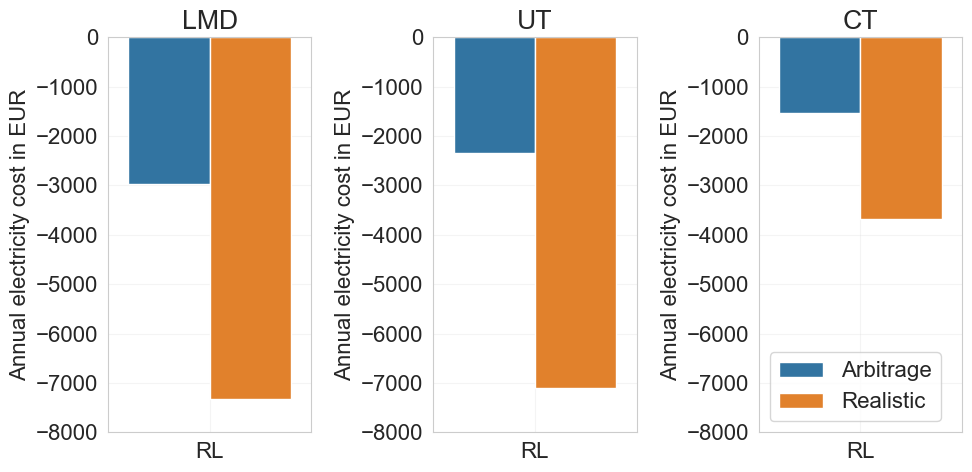

In [40]:
(fig, ax) = plt.subplots(1,3, figsize=(10,5))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_lmd, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ut, ax=ax[1])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ct, ax=ax[2])

#ax.set_ylim([-1800, 350])
ax[0].grid(alpha=0.2)
ax[0].title.set_text("LMD")
ax[0].axhline(0, color='black', linewidth=0.7)
ax[0].get_legend().remove()


#ax[1].set_ylim([-1800, 350])
ax[1].grid(alpha=0.2)
ax[1].get_legend().remove()
ax[1].set_ylabel("")
ax[1].title.set_text("UT")
ax[1].axhline(0, color='black', linewidth=0.7)

#ax[1].set_yticklabels("")
ax[2].grid(alpha=0.2)
ax[2].get_legend().remove()
ax[2].set_ylabel("")
ax[2].title.set_text("CT")
ax[2].axhline(0, color='black', linewidth=0.7)
ax[2].legend(loc="lower left")

for i in range(3):
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Annual electricity cost in EUR")
    #ax.set_xticks([0,1,2,3,4],["Dumb", "Dist", "Night", "RL", "LP"], rotation=45)
    #ax.set_yticks([-1500, -1250, -1000, -750, -500, -250, 0, 250])
    ax[i].set_ylim([-8000, 0])




plt.tight_layout()
plt.savefig("absolute_results_ppo_5.pdf")
plt.show()

In [24]:
(fig, ax) = plt.subplots(1,3, figsize=(8,4))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_lmd, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ut, ax=ax[1])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ct, ax=ax[2])

ax[0].set_ylim([-1700, 350])
ax[0].grid(alpha=0.2)
ax[0].legend(loc="lower right")
ax[0].title.set_text("LMD")
ax[0].axhline(0, color='black', linewidth=0.7)



ax[1].set_ylim([-1700, 350])
ax[1].grid(alpha=0.2)
ax[1].get_legend().remove()
ax[1].set_ylabel("")
ax[1].title.set_text("UT")
ax[1].axhline(0, color='black', linewidth=0.7)

#ax[1].set_yticklabels("")
ax[2].set_ylim([-1700, 350])
ax[2].grid(alpha=0.2)
ax[2].get_legend().remove()
ax[2].set_ylabel("")
ax[2].title.set_text("CT")
ax[2].axhline(0, color='black', linewidth=0.7)


plt.tight_layout()
plt.savefig("test.pdf")
plt.show()

In [ ]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]
rl_arb = rl_lmd_arb["Cashflow"].sum() + (min_missing - rl_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000
rl_real = rl_lmd_real["Cashflow"].sum() + (min_missing - rl_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000


rel_cashflow_comp_lmd = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_lmd_arb["Cashflow"].sum() + (min_missing - dumb_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (dist_lmd_arb["Cashflow"].sum() + (min_missing - dist_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (night_lmd_arb["Cashflow"].sum() + (min_missing - night_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_arb - (lin_lmd_arb["Cashflow"].sum() + (min_missing - lin_lmd_arb["SOC violation"].sum()) * 60 * avg_price / 1000)*5,
        rl_real - (dumb_lmd_real["Cashflow"].sum() + (min_missing - dumb_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (dist_lmd_real["Cashflow"].sum() + (min_missing - dist_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (night_lmd_real["Cashflow"].sum() + (
                    min_missing - night_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000),
        rl_real - (lin_lmd_real["Cashflow"].sum() + (min_missing - lin_lmd_real["SOC violation"].sum()) * 60 * avg_price / 1000)*5
    ]
})

In [ ]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

rl_arb = rl_ut_arb["Cashflow"].sum() + (min_missing - rl_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000

rl_real = rl_ut_real["Cashflow"].sum() + (min_missing - rl_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000


rel_cashflow_comp_ut = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_ut_arb["Cashflow"].sum() + (min_missing - dumb_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_arb - (dist_ut_arb["Cashflow"].sum() + (min_missing - dist_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_arb - (night_ut_arb["Cashflow"].sum() + (min_missing - night_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_arb - (lin_ut_arb["Cashflow"].sum() + (min_missing - lin_ut_arb["SOC violation"].sum()) * 50 * avg_price / 1000)*5,
        rl_real - (dumb_ut_real["Cashflow"].sum() + (min_missing - dumb_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_real - (dist_ut_real["Cashflow"].sum() + (min_missing - dist_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_real - (night_ut_real["Cashflow"].sum() + (min_missing - night_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000),
        rl_real - (lin_ut_real["Cashflow"].sum() + (min_missing - lin_ut_real["SOC violation"].sum()) * 50 * avg_price / 1000)*5
    ]
})

In [ ]:
min_missing = dumb_ct_arb["SOC violation"].sum()
avg_price = dumb_ct_arb["Observation"].mean()[4]

rl_arb = rl_ct_arb["Cashflow"].sum() + (min_missing - rl_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000
rl_real = rl_ct_real["Cashflow"].sum() + (min_missing - rl_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000


rel_cashflow_comp_ct = pd.DataFrame({
    'Charging Method': ["Dumb", "Dist", "Night", "LP"] * 2,
    'Case': ['Arbitrage'] * 4 + ['Realistic'] * 4,
    'Cashflow': [
        rl_arb - (dumb_ct_arb["Cashflow"].sum() + (min_missing - dumb_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_arb - (dist_ct_arb["Cashflow"].sum() + (min_missing - dist_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_arb - (night_ct_arb["Cashflow"].sum() + (min_missing - night_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_arb - (lin_ct_arb["Cashflow"].sum() + (min_missing - lin_ct_arb["SOC violation"].sum()) * 16.7 * avg_price / 1000)*5,
        rl_real - (dumb_ct_real["Cashflow"].sum() + (min_missing - dumb_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_real - (dist_ct_real["Cashflow"].sum() + (min_missing - dist_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_real - (night_ct_real["Cashflow"].sum() + (min_missing - night_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000),
        rl_real - (lin_ct_real["Cashflow"].sum() + (min_missing - lin_ct_real["SOC violation"].sum()) * 16.7 * avg_price / 1000)*5
    ]
})

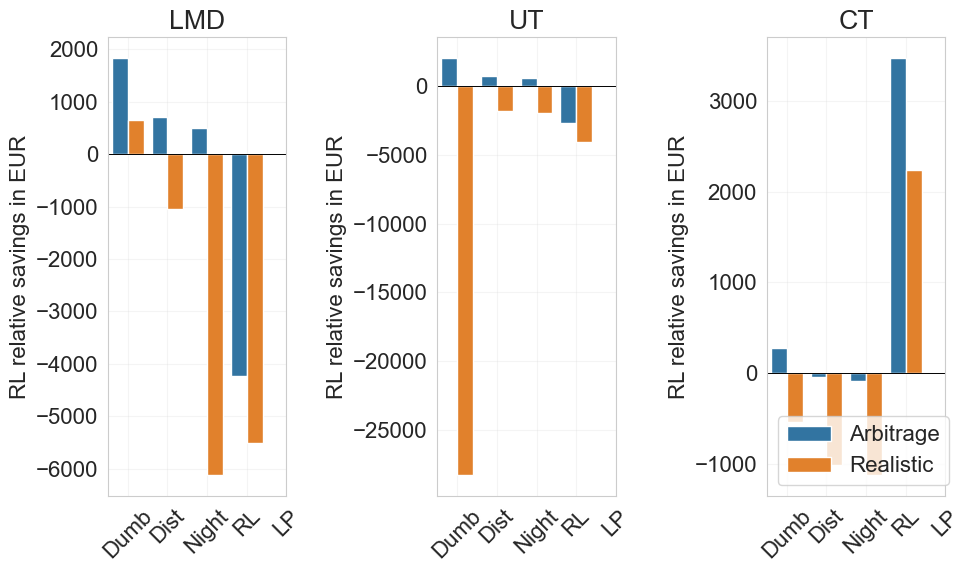

In [54]:
(fig, ax) = plt.subplots(1,3, figsize=(10,6))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_lmd, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_ut, ax=ax[1])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_ct, ax=ax[2])

#ax[0].set_ylim([-900, 900])
ax[0].grid(alpha=0.2)
ax[0].legend(loc="lower left")
ax[0].title.set_text("LMD")
ax[0].axhline(0, color='black', linewidth=0.7)
ax[0].set_ylabel("RL relative savings in EUR")
ax[0].get_legend().remove()


#ax[1].set_ylim([-900, 900])
ax[1].grid(alpha=0.2)
ax[1].get_legend().remove()
ax[1].set_ylabel("")
ax[1].title.set_text("UT")
ax[1].axhline(0, color='black', linewidth=0.7)
ax[1].set_ylabel("RL relative savings in EUR")


#ax[1].set_yticklabels("")
#ax[2].set_ylim([-900, 900])
ax[2].grid(alpha=0.2)
ax[2].get_legend().remove()
ax[2].set_ylabel("")
ax[2].title.set_text("CT")
ax[2].axhline(0, color='black', linewidth=0.7)
ax[2].set_ylabel("RL relative savings in EUR")
ax[2].legend(loc="lower left")

for i in range(3):
    ax[i].set_xlabel("")
    #ax[i].set_ylabel("Annual electricity cost in EUR")
    ax[i].set_xticks([0,1,2,3,4],["Dumb", "Dist", "Night", "RL", "LP"], rotation=45)
    #ax[i].set_yticks([-1500, -1250, -1000, -750, -500, -250, 0, 250])
    #ax[i].set_ylim([-900, 900])

plt.tight_layout()
# plt.savefig("relative_results_ppo.pdf")
plt.show()

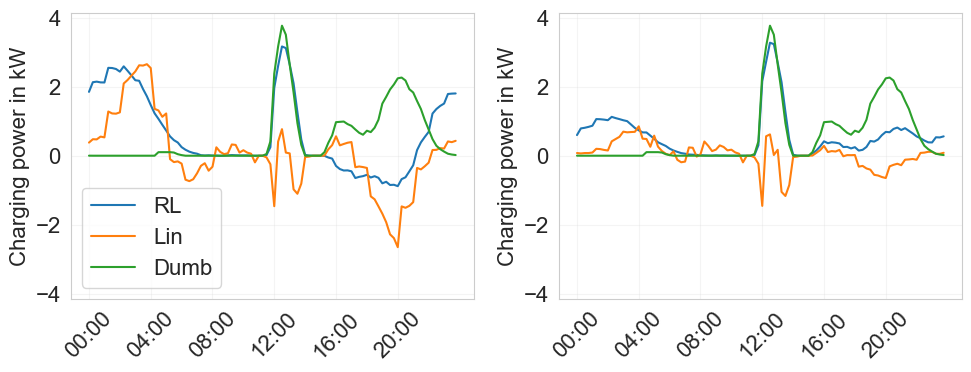

In [17]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1,2, figsize=(10,4))
mean_rl_ct_arb.rolling(1).mean().plot(ax = ax[0], legend=False)
# mean_night_ct_arb.plot(ax = ax[0], legend=False)
# mean_dist_ct_arb.plot(ax = ax[0], legend=False)
mean_lin_ct_arb.rolling(1).mean().plot(ax = ax[0], legend=False)
mean_dumb_ct_arb.rolling(1).mean().plot(ax = ax[0], legend=False)

mean_rl_ct_real.rolling(1).mean().plot(ax=ax[1], legend=False)
# mean_night_ct_real.plot(ax = ax[1], legend=False)
# mean_dist_ct_real.plot(ax = ax[1], legend=False)
mean_lin_ct_real.rolling(1).mean().plot(ax = ax[1], legend=False)
mean_dumb_ct_real.rolling(1).mean().plot(ax = ax[1], legend=False)
max = rl_ct_arb.loc[0, "Observation"][-10]

# Define your ticks and labels
ticks = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88]
labels = ["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"]

# Only keep every second tick and label
ticks = ticks[::2]
labels = labels[::2]



for i in range(2):
    ax[i].set_xticks([0,8,16,24,32,40,48,56,64,72,80,88]
           ,["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"],
           rotation=45)
    ax[i].grid(alpha=0.2)
    ax[i].set_ylabel("Charging power in kW")
    # Set the new ticks and labels
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(labels)
    ax[i].set_ylim([-max * 0.9, max * 0.9])
    ax[0].legend(["RL", "Lin", "Dumb", "Dist", "Lin"])




plt.tight_layout()
#plt.savefig("ct_arb_rl_lin_curve_5.pdf")
plt.show()

/tmp/ipykernel_8714/2664257982.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels()[0:12][::2])[0:12]
/tmp/ipykernel_8714/2664257982.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels()[0:12][::2])[0:12]


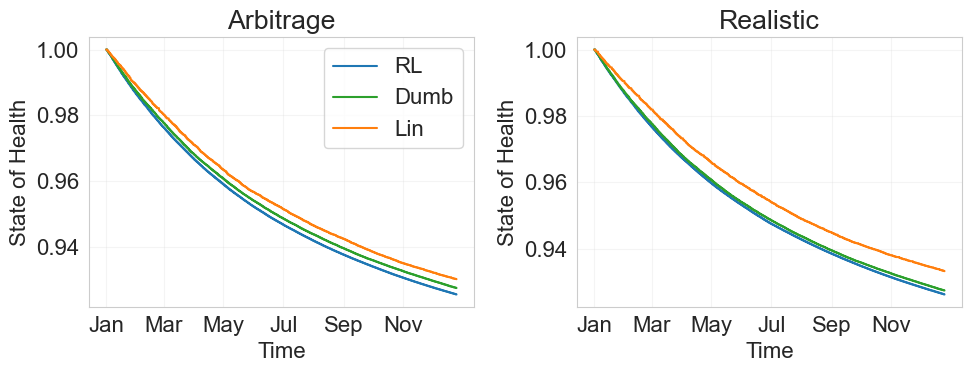

In [18]:
import pandas as pd
import matplotlib.dates as mdates

# Create a date range from Jan to Dec
# Create a date range from Jan to Dec with a 15-mincte resolction
date_range = pd.date_range(start="2023-01-01", end="2023-12-31", freq='15min')

# Check if the lengths match
#print(len(date_range) == len(rl_ct_arb))  # should print True

# Continue with the rest of the code...

# Create a figure
fig, ax = plt.subplots(1,2, figsize=(10,4))

# Rescale the index of the dataframes to match the date range
rescaled_log_RL = rl_ct_arb.copy()
rescaled_log_RL.index = date_range[:len(rl_ct_arb)]
rescaled_dumb_log = dumb_ct_arb.copy()
rescaled_dumb_log.index = date_range[:len(dumb_ct_arb)]
rescaled_lin_log = lin_ct_arb.copy()
rescaled_lin_log.index = date_range[:len(lin_ct_arb)]

# Plot the data
ax[0].plot(rescaled_log_RL.index, [rescaled_log_RL['SOH'][i].mean() for i in range(len(rescaled_log_RL))], label='RL', color='#1f77b4')
ax[0].plot(rescaled_dumb_log.index, rescaled_dumb_log['SOH'], label='Dumb', color='#2ca02c')
ax[0].plot(rescaled_lin_log.index, rescaled_lin_log['SOH'], label='Lin', color='#ff7f0e')


# Set the title and labels
ax[0].set_title('Arbitrage')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('State of Health')
ax[0].legend()

ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax[0].set_xticklabels(ax[0].get_xticklabels()[0:12][::2])[0:12]
ax[0].set_xticks(ax[0].get_xticks()[0:12][::2])[0:12]
ax[0].grid(alpha=0.2)

rescaled_log_RL = rl_ct_real.copy()
rescaled_log_RL.index = date_range[:len(rl_ct_real)]
rescaled_dumb_log = dumb_ct_real.copy()
rescaled_dumb_log.index = date_range[:len(dumb_ct_real)]
rescaled_lin_log = lin_ct_real.copy()
rescaled_lin_log.index = date_range[:len(lin_ct_real)]


# Plot the data
ax[1].plot(rescaled_log_RL.index, [rescaled_log_RL['SOH'][i].mean() for i in range(len(rescaled_log_RL))], label='RL', color='#1f77b4')
ax[1].plot(rescaled_dumb_log.index, rescaled_dumb_log['SOH'], label='Dumb', color='#2ca02c')
ax[1].plot(rescaled_lin_log.index, rescaled_lin_log['SOH'], label='Lin', color='#ff7f0e')


# Set the title and labels
ax[1].set_title('Realistic')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('State of Health')
ax[1].legend()
ax[1].grid(alpha=0.2)

ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax[1].set_xticklabels(ax[1].get_xticklabels()[0:12][::2])[0:12]
ax[1].set_xticks(ax[1].get_xticks()[0:12][::2])[0:12]

ax[1].get_legend().remove()

# Show the plot
plt.tight_layout()
#plt.savefig("ct_soh_rl_lin_dumb_5.pdf")
plt.show()

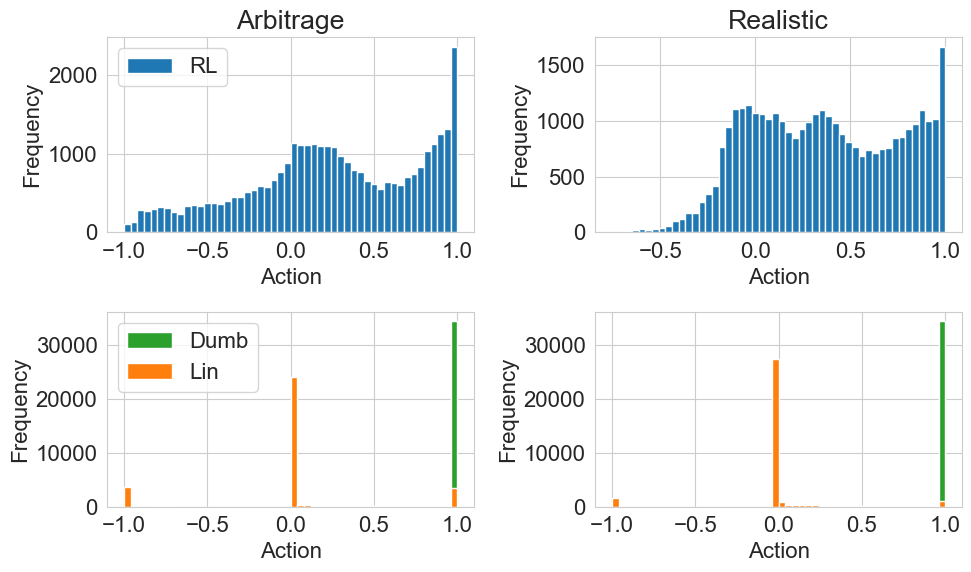

In [19]:


# Create a figure with two subplots side by side
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot the distribction of actions for the RL-based strategy on the first subplot
axs[0][0].hist([rl_ct_arb['Action'][i].mean() for i in range(len(rl_ct_arb))], bins=50, color='#1f77b4')#, edgecolor='black')
axs[0][0].set_title('Arbitrage')
axs[0][0].set_xlabel('Action')
axs[0][0].set_ylabel('Frequency')
axs[0][0].legend(["RL"])

# Plot the distribction of actions for the dumb strategy on the second subplot
axs[1][0].hist(dumb_ct_arb['Action'], bins=25, color='#2ca02c')#, edgecolor='black')
#axs[1].hist(night_ct_arb['Action'].apply(lambda x: x[0]), bins=50, color='green', edgecolor='black')
#axs[1].hist(dist_ct_arb['Action'].apply(lambda x: x[0]), bins=50, color='orange', edgecolor='black')
axs[1][0].hist(lin_ct_arb['Action'].apply(lambda x: x[0]), bins=50, color='#ff7f0e')#, edgecolor='black')

axs[1][0].set_xlabel('Action')
axs[1][0].set_ylabel('Frequency')
axs[1][0].legend(["Dumb", "Lin"])

axs[0][1].set_title('Realistic')
axs[0][1].hist([rl_ct_real['Action'][i].mean() for i in range(len(rl_ct_real))], bins=50, color='#1f77b4')#, edgecolor='black')
axs[0][1].set_xlabel('Action')
axs[0][1].set_ylabel('Frequency')

# Plot the distribction of actions for the dumb strategy on the second subplot
axs[1][1].hist(dumb_ct_real['Action'], bins=25, color='#2ca02c')#, edgecolor='black')
#axs[1].hist(night_ct_arb['Action'].apply(lambda x: x[0]), bins=50, color='green', edgecolor='black')
#axs[1].hist(dist_ct_arb['Action'].apply(lambda x: x[0]), bins=50, color='orange', edgecolor='black')
axs[1][1].hist(lin_ct_real['Action'].apply(lambda x: x[0]), bins=50, color='#ff7f0e')#, edgecolor='black')

axs[1][1].set_xlabel('Action')
axs[1][1].set_ylabel('Frequency')


plt.tight_layout()
#plt.savefig("ppo_ct_act_dist_lin_dumb_5.pdf")

plt.show()


In [ ]:
(fig, ax) = plt.subplots(1,2, figsize=(10,6))
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=cashflow_comp_ut, ax=ax[0])
sns.barplot(x='Charging Method', y='Cashflow', hue='Case', data=rel_cashflow_comp_ut, ax=ax[1])

#ax[0].set_ylim([-4000, 1500])
ax[0].grid(alpha=0.2)
ax[0].title.set_text("Absolute spendings")
ax[0].axhline(0, color='black', linewidth=0.7)
ax[0].get_legend().remove()
ax[0].set_ylabel("Annual electricity cost in EUR")
ax[0].set_xlabel("")

#ax[1].set_ylim([-4000, 1500])
ax[1].grid(alpha=0.2)
ax[1].legend(loc="lower left")
ax[1].title.set_text("Relative savings of RL")
ax[1].axhline(0, color='black', linewidth=0.7)
ax[1].set_ylabel("RL relative savings in EUR")
#ax[1].get_legend().remove()
ax[1].set_xlabel("")

plt.tight_layout()
plt.savefig("economics_ut_5.pdf")
plt.show()

7.262322178023368

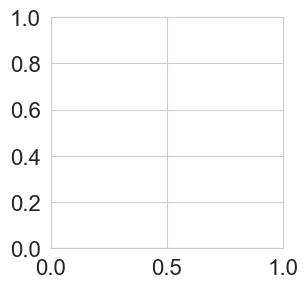

In [104]:
fig, axs = plt.subplots(1,1, figsize=(3,3))

rl_lmd_real.loc[rl_lmd_real["SOC violation"] > 0, "SOC violation"].sort_values(ascending=False).reset_index(drop=True).sum()


In [25]:
soc_lin_lmd_arb = pd.DataFrame([lin_lmd_arb["Observation"][i][0] for i in range(len(lin_lmd_arb))])
soc_lin_lmd_real = pd.DataFrame([lin_lmd_real["Observation"][i][0] for i in range(len(lin_lmd_real))])
soc_rl_lmd_arb = pd.DataFrame([rl_lmd_arb["Observation"][i][0] for i in range(len(rl_lmd_arb))])
soc_rl_lmd_real = pd.DataFrame([rl_lmd_real["Observation"][i][0] for i in range(len(rl_lmd_real))])

In [40]:
soc_lin_lmd_arb["date"] = pd.date_range(start=lin_lmd_arb["Time"][0], end=lin_lmd_arb["Time"].iloc[-1], freq="15T")

     0                date
0  0.0 2020-01-01 15:00:00
1  0.0 2020-01-01 15:15:00
2  0.0 2020-01-01 15:30:00
3  0.0 2020-01-01 15:45:00
4  0.0 2020-01-01 16:00:00


In [43]:
soc_lin_lmd_arb.to_csv("soc_lin_arb.csv")

In [23]:
soc_rl_lmd_arb.to_csv("soc_rl_arb.csv")

In [26]:
soc_lin_lmd_real.to_csv("soc_lin_real.csv")
soc_rl_lmd_real.to_csv("soc_rl_real.csv")


In [30]:
rl_lmd_arb["Grid overloading"].sum()

0.0

In [6]:
rl_ct_real

NameError: name 'rl_ct_real' is not defined

In [ ]:
import plotly.express as px

# Sample data
# Replace this with your actual DataFrame
df = pd.DataFrame({
    'Date': rl_ct_arb["Time"],
    'SOC': [rl_ct_arb["Observation"][i][0] for i in range(len(rl_ct_arb))],
    'Load': [rl_ct_arb["Observation"][i][19] for i in range(len(rl_ct_arb))],
    'Price': [rl_ct_arb["Observation"][i][10] for i in range(len(rl_ct_arb))],
    'Action': [rl_ct_arb["Action"][i][0:4].sum()*rl_ct_arb["Observation"][0][-10] for i in range(len(rl_ct_arb))],
    'Free cap': [rl_ct_arb["Observation"][i][-8] / rl_ct_arb["Observation"][i][-9] for i in range(len(rl_ct_arb))]
})
df.set_index('Date', inplace=True)

# Create an interactive time series plot using Plotly Express
fig = px.line(df, x=df.index, y=df.columns)

# Customize the plot (optional)
fig.update_layout(
    title="Interactive Time Series Plot",
    xaxis_title="Date",
    yaxis_title="Value",
    legend_title="Variables",
)

# Show the plot
fig.show()


In [14]:
rl_ct_arb["Observation"][0]

array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
       46.59     , 52.99     , 60.26     , 60.61     , 60.36     ,
       57.4      , 53.86     , 53.45     , 49.72     , 46.59     ,
       52.99     , 60.26     , 60.61     , 60.36     , 57.4      ,
       53.86     , 53.45     , 49.72     ,  2.7025754,  3.7803192,
        5.9358068,  5.9358068,  5.9358068,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  4.6      , 36.93984  ,
       34.237263 ,  1.       ,  0.5      ,  0.8660254,  0.8660254,
       -0.5      , -0.8169699, -0.5766803], dtype=float32)